# The quality of a scientific manuscript given by a peer-reviewed report in three dimensions: Accessibility, Contribution and Experimentation (AccConExp)
## PLS-SEM Part
ASPECT CATEGORIES

* Motivation/Impact (MOT): Does the paper deal with a crucial issue? Could other professionals or researchers expand upon or use these concepts?
Originality
* (ORI): Are there any novel research methodologies, techniques, or insights?
* Soudness/Correctness (SOU):  Is the proposed approach sound? Does the paper support its claims convincingly?

* Substance(SUB): Does the paper provide substantial experiments to support the viabilityof the suggested approaches? Are thorough outcome analysesavailable? Does it have relevant ablation studies?

* Clarity (CLA):How well prepared is your reader to understand what you did andwhy? How well-written and structured is the paper?

* Meaningful Comparison (CMP):Is comparing the work to previous work sufficient, given the space constraints? Are the comparisons fair?

Sentiment Analysis (POS NEG)
We have taken the aspect-categories of the reports from the paper:
Can We Automate Scientific Reviewing?
https://arxiv.org/pdf/2102.00176.pdf

Code in https://github.com/neulab/ReviewAdvisor

### How to build the new construct given in AccConExp Model
We will build four latent concepts (or constructs) from the aspect categories considered in the reviews of scientific manuscripts. Accessibility, Contribution and Experimentation and Decision. Being
* Accessibility: If the document is well described, it conducts relevant analysis and discussions, facilitating the reader's understanding. It is well documented with references and mentions the progress to date related to the proposal.

* Contribution: It is analyzed whether the proposal represents a great advance to the community or in the specific area of the proposal. Furthermore, it is determined whether the proposal is well motivated and, therefore, necessary to develop.

* Experimentation: A set of experiments is proposed to validate the proposal. Comparisons with existing methods must be fair. The results obtained are correctly analyzed.

* Decision: what is the final decision about the acceptance or rejection of the article based on the concepts of Accessibility, Contribution and Experimentation? Depending on the given decision, we have reinterpreted it in the following way: Suppose the article is accepted and the number of aspects with positive polarity is greater than the number of aspects with negative polarity. In that case, the decision will take the value of the number of positive aspects compared to the total of aspects (positive + negative) considered in the article. In the same way, it is considered when the number of aspects with negative aspects is more significant than the positive. In this case, the decision value will be the rate between the total number of aspects with negative polarity and the total number of aspects.


The PLS-SEM model that we are going to consider is shown in the following image:
![](https://drive.google.com/uc?id=1o47AI_SuuuRHVdmQlRqoo1ffT0SKjfgf)

The aspects considered are reflective (unlike the formative ones, such as the indicator associated with decision). Thus, a manuscript that is accessible will reflect clarity and/or soundness. Next, we give a brief explication of concepts to validate the model proposed.
* loadings ($\lambda$): They are the labels of the arcs that go from a constructor (latent variable) to an indicator (part of the external model). The loading expresses the correlation between the constructor or latent variable and its indicator. The communalities are the squared values of the loadings. These represent the amount of variability explained by the construct or latent variable. For example, Accessibilida explains 0.78^2 of the clarity aspect.

* cross-loadings: Una vez que se ha comprobado los loadings se debe analizar los cross-loadings. Esto es los loadings de un indicador con el resto de constructores y ver que en los otros constructores a los que no esta asociado tiene un valor de loading menor


A constructor is well defined by its indicators if:
* Dillon-Goldstein's rho is a coefficient that evaluates how well a block of indicators measures its corresponding construct or latent variable. According to the Dillon-Goldstein theory, rho must be greater than 0.7.

* Average Variance Extracted (AVE): AVE varies from 0 to 1. An AVE value of 0.5 means that the construct or latent variable represents, on average, 50 percent or more of the variance in the observed variables. For example, Accessibility has a score of 0.61, which means that, on average, Accessibility represents 61 percent of the variance of clarity and soundness (on average).


* $R^2$ indicates the percentage that the exogenous latent variables (they are the independent constructs in our case Accessibility, Contribution and Experimentation) predict the endogenous variable, in our model Decision, that is, the amount of variability that Experimentation, Contribution and Accessibility explain about Decision construct. In our case it is 0.66

* Effect indicates the effect that one constructor has on another. To do this, the value of R^2 is obtained without taking into account the constructor and this new value is subtracted from the value of R^2 obtained with all the constructs. In our scheme we see the effect that Accessibility has on Decision, Contribution on Decision and Experimentation on Decision.

* The goodness of fit is predicting the value of Decisión using exogenous constructs.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install plspm
!pip install pandas==1.5.3
import json
import pandas as pd, plspm.config as config_pls
from plspm.plspm import Plspm
from plspm.scheme import Scheme
from plspm.mode import Mode
import numpy as np







     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 53.1 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 1.5.3 which is incompatible.


In [3]:

#change to your data folder
path_data='/content/drive/MyDrive/Colab Notebooks/tesis_juanjo/Accesibilidad_Contribution_Reports/'

In [4]:
#Preparamos los datos
#mantenemos distinción entre negativos y positivos
file_data = path_data+'/data/paper_aspect_decision.csv'


data = pd.read_csv(file_data,sep=';')
print(len(data))
cols = ['originality_positive', 'originality_negative',
       'substance_positive', 'substance_negative', 'motivation_positive',
       'motivation_negative', 'clarity_positive', 'clarity_negative',
       'soundness_positive', 'soundness_negative',
       'meaningful_comparison_positive', 'meaningful_comparison_negative',
       'replicability_positive', 'replicability_negative', 'decision']
cols_neg =['originality_negative','substance_negative','motivation_negative','clarity_negative','soundness_negative','meaningful_comparison_negative','replicability_negative']
cols_pos =['originality_positive','substance_positive','motivation_positive','clarity_positive','soundness_positive','meaningful_comparison_positive','replicability_positive']
cols_sinsen=['originality','substance','motivation','clarity','soundness','meaningful_comparison','replicability','decision_ref']


data.loc[data['decision']==0,'decision']=-1

#By default the paper's decision  is neutral(0).
data["decision_ref"]=0
for index in range(len(data)):
  negativos=0
  positivos=0
  totales =0
  #Add all negative aspects
  for c in cols_neg:
    if data.loc[index,c]<0:
      negativos+=-data.loc[index,c]
      totales +=-data.loc[index,c]
  #Add all negative aspects
  for c in cols_pos:
    if data.loc[index,c]>0:
      positivos+=data.loc[index,c]
      totales +=data.loc[index,c]
  #if there are aspects
  if totales>0:
    razon_pos = positivos/totales #ratio of positive aspects
    razon_neg = negativos/totales #ratio of negative aspects
    if (data.loc[index,'decision']<0): #if the original decision was reject
      if (razon_pos<razon_neg):#if the ratio of positive aspects is lesser than the negative aspects
        data.loc[index,"decision_ref"]=-razon_neg #the refinement decision is the negative ratio of negative aspects
    else:
       if (data.loc[index,'decision']>0): # if the original decision was accept
        if (razon_pos>razon_neg): # the ratio of positive aspects is bigger than
          data.loc[index,"decision_ref"]=razon_pos #the refinement decision is the ratio of positive aspects




#print(data[cols_sinsen].corr())
#print(data[cols_sinsen].describe())
#print(data.columns)
#print(data[['id']+cols_sinsen].head())

8742


# AccConExp Model. PLS-SEM
We eliminate the two components (positive and negative) of the aspects by integrating everything into a single indicator that can take positive and negative values.


In [39]:
import warnings
warnings.filterwarnings('ignore')
#we define four constructors
structure = config_pls.Structure()


structure.add_path(['Accessibility'],["Decision"])
structure.add_path(['Contribution'],["Decision"])
structure.add_path(['Experimentation'],["Decision"])

config = config_pls.Config(structure.path(), scaled=True)

config.add_lv("Accessibility", Mode.A,config_pls.MV('clarity'), config_pls.MV('soundness'))
config.add_lv("Contribution", Mode.A,config_pls.MV('originality'),config_pls.MV('motivation'))
config.add_lv("Experimentation", Mode.A,config_pls.MV('substance'),config_pls.MV('meaningful_comparison'))

config.add_lv("Decision", Mode.B,config_pls.MV('decision_ref'))
plspm_calc = Plspm(data, config, Scheme.CENTROID,bootstrap=True)

#plspm_calc = Plspm(data, config, Scheme.CENTROID)#without bootstrap
print(plspm_calc.inner_summary())





                       type  r_squared  r_squared_adj  block_communality  \
Accessibility     Exogenous   0.000000       0.000000           0.614906   
Contribution      Exogenous   0.000000       0.000000           0.563471   
Decision         Endogenous   0.659402       0.659285           1.000000   
Experimentation   Exogenous   0.000000       0.000000           0.595972   

                 mean_redundancy       ave  
Accessibility           0.000000  0.614906  
Contribution            0.000000  0.563471  
Decision                0.659402       NaN  
Experimentation         0.000000  0.595972  


In [40]:
print(plspm_calc.inner_model())
print(plspm_calc.crossloadings())

                                        from        to  estimate  std error  \
index                                                                         
Experimentation -> Decision  Experimentation  Decision  0.291487   0.006458   
Contribution -> Decision        Contribution  Decision  0.388906   0.006334   
Accessibility -> Decision      Accessibility  Decision  0.513900   0.006528   

                                     t  p>|t|  
index                                          
Experimentation -> Decision  45.133075    0.0  
Contribution -> Decision     61.400882    0.0  
Accessibility -> Decision    78.716728    0.0  
                       Experimentation  Contribution  Accessibility  Decision
clarity                       0.134199      0.100586       0.783136  0.479440
soundness                     0.263046      0.157460       0.785181  0.542661
originality                   0.060005      0.886803       0.096257  0.399357
motivation                    0.058576      0.583543

In [41]:
print(plspm_calc.unidimensionality())

                mode  mvs  cronbach_alpha  dillon_goldstein_rho   eig_1st  \
Experimentation    A  2.0        0.332757              0.749838  1.199585   
Contribution       A  2.0        0.248971              0.727001  1.142185   
Accessibility      A  2.0        0.373737              0.761538  1.229813   
Decision           B  1.0             NaN                   NaN  1.000000   

                  eig_2nd  
Experimentation  0.800415  
Contribution     0.857815  
Accessibility    0.770187  
Decision              NaN  


In [42]:
print(plspm_calc.effects())
#the effects that each construct has on the rest of constructs by taking into consideration the total number of connections in the inner model

                                        from        to    direct  indirect  \
Experimentation -> Decision  Experimentation  Decision  0.291487       0.0   
Contribution -> Decision        Contribution  Decision  0.388906       0.0   
Accessibility -> Decision      Accessibility  Decision  0.513900       0.0   

                                total  
Experimentation -> Decision  0.291487  
Contribution -> Decision     0.388906  
Accessibility -> Decision    0.513900  


In [43]:
print(plspm_calc.goodness_of_fit())

0.6245020750310193


In [44]:
b=plspm_calc.bootstrap()
print("R_squared")
print(b.r_squared())
print("")
print("Efects")
print(b.total_effects())
print()
print("Paths")
print(b.paths())

print()
print("Loadings")
print(b.loading())





R_squared
          original      mean  std.error  perc.025  perc.975     t stat.
Decision  0.659402  0.659265    0.00548  0.647358  0.668822  120.338934

Efects
                             original      mean  std.error  perc.025  \
Experimentation -> Decision  0.291487  0.290851   0.006604  0.276164   
Contribution -> Decision     0.388906  0.389203   0.005411  0.379546   
Accessibility -> Decision    0.513900  0.513852   0.006565  0.500952   

                             perc.975    t stat.  
Experimentation -> Decision  0.305347  44.139619  
Contribution -> Decision     0.397652  71.872693  
Accessibility -> Decision    0.525335  78.283912  

Paths
                             original      mean  std.error  perc.025  \
Experimentation -> Decision  0.291487  0.290851   0.006604  0.276164   
Contribution -> Decision     0.388906  0.389203   0.005411  0.379546   
Accessibility -> Decision    0.513900  0.513852   0.006565  0.500952   

                             perc.975    t stat. 

In [11]:
print(plspm_calc.scores().describe())

       Experimentation  Contribution  Accessibility      Decision
count     8.742000e+03  8.742000e+03   8.742000e+03  8.742000e+03
mean     -1.300467e-17  5.526985e-17  -3.901401e-17  7.152569e-17
std       1.000057e+00  1.000057e+00   1.000057e+00  1.000057e+00
min      -5.072358e+00 -4.094125e+00  -5.206905e+00 -1.722481e+00
25%      -5.287597e-01 -5.618509e-01  -6.577085e-01 -1.067993e+00
50%       2.330862e-01  2.569949e-02   1.562906e-01  2.282075e-02
75%       6.956056e-01  6.816315e-01   7.295255e-01  1.020136e+00
max       4.014838e+00  4.740045e+00   3.854806e+00  1.768122e+00


In [12]:
#see the prediction of the construct and compare with the results of the next cell
print(plspm_calc.scores().head())
print('Minimum values ',plspm_calc.scores().min())
print("Maximum values ",plspm_calc.scores().max())

   Experimentation  Contribution  Accessibility  Decision
0         0.695606      0.483458       0.729526  1.768122
1        -0.528760      0.223873      -1.581756  0.022821
2        -0.610356      0.811424       0.156291  0.022821
3         0.777202      0.941216       0.747867  1.518794
4        -0.147837      1.071008       0.156291  0.022821
Minimum values  Experimentation   -5.072358
Contribution      -4.094125
Accessibility     -5.206905
Decision          -1.722481
dtype: float64
Maximum values  Experimentation    4.014838
Contribution       4.740045
Accessibility      3.854806
Decision           1.768122
dtype: float64


In [13]:
c_aux =['id']+cols_sinsen+['decision']
print(data[c_aux].head())
#print(data['decision'].describe())
print(len(data['decision']))

              id  originality  substance  motivation  clarity  soundness  \
0    ICLR_2017_1            2          0           0        2          0   
1   ICLR_2017_10            0         -1           2       -1         -5   
2  ICLR_2017_100            2         -2           1        1         -1   
3  ICLR_2017_101            3          1           0        1          1   
4  ICLR_2017_102            4         -1          -1        1         -1   

   meaningful_comparison  replicability  decision_ref  decision  
0                      0              0      1.000000         1  
1                     -2              0      0.000000         1  
2                     -1             -1      0.000000         1  
3                     -1              0      0.857143         1  
4                     -1             -1      0.000000         1  
8742


In [45]:
#we joint score with data
cols_sinsen=['originality','substance','motivation','clarity','soundness','meaningful_comparison']

cols_to_norm=cols_sinsen+['decision']+["Accessibility","Contribution","Experimentation","Decision"]
new_pd= pd.concat([data[c_aux],plspm_calc.scores()],axis=1)
#normalize
normalized_df=(new_pd[cols_to_norm]-new_pd[cols_to_norm].min())/(new_pd[cols_to_norm].max()-new_pd[cols_to_norm].min())
normalized_df['id']=data['id']
print(normalized_df.head())
normalized_df.to_csv(path_data+"/data/Scores_PLSSem.csv",sep=';')


   originality  substance  motivation   clarity  soundness  \
0     0.588235   0.555556    0.400000  0.708333       0.55   
1     0.470588   0.500000    0.533333  0.583333       0.30   
2     0.588235   0.444444    0.466667  0.666667       0.50   
3     0.647059   0.611111    0.400000  0.666667       0.60   
4     0.705882   0.500000    0.333333  0.666667       0.50   

   meaningful_comparison  decision  Accessibility  Contribution  \
0               0.769231       1.0       0.655111      0.518168   
1               0.615385       1.0       0.400051      0.488784   
2               0.692308       1.0       0.591852      0.555293   
3               0.692308       1.0       0.657136      0.569985   
4               0.692308       1.0       0.591852      0.584677   

   Experimentation  Decision             id  
0         0.634735  1.000000    ICLR_2017_1  
1         0.500000  0.500000   ICLR_2017_10  
2         0.491021  0.500000  ICLR_2017_100  
3         0.643714  0.928571  ICLR_2017_

<Axes: xlabel="Editor's Decision", ylabel='Decision calculated'>

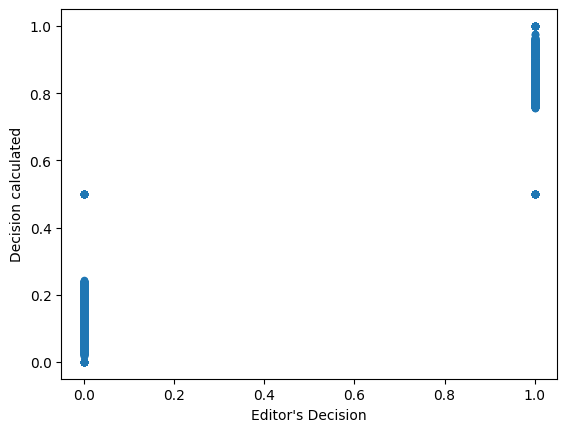

In [46]:
#Comparison between editor's decision (decision) and decision calculated in PLS-SEM (Decision)
#0-->reject
#1-->accept
df = normalized_df
df.plot.scatter(x='decision', y='Decision',xlabel='Editor\'s Decision',ylabel='Decision calculated')

In [72]:
#aux=df.query('decision==1').sample(n=1000,random_state=42)
aux=df.query('decision==1')
#cmap='viridis', s=data['a']*100, marker=data['b'])
#aux.plot.scatter(x="Accessibility",y="Contribution",c="Experimentation",figsize=(12,10),cmap='jet', s=aux['Experimentation']*500)
print(aux.describe())

       originality    substance   motivation      clarity    soundness  \
count  5309.000000  5309.000000  5309.000000  5309.000000  5309.000000   
mean      0.514819     0.524843     0.475319     0.633829     0.564466   
std       0.097926     0.084846     0.095821     0.088271     0.097302   
min       0.000000     0.000000     0.133333     0.041667     0.150000   
25%       0.470588     0.500000     0.400000     0.583333     0.500000   
50%       0.529412     0.555556     0.466667     0.625000     0.550000   
75%       0.588235     0.555556     0.533333     0.708333     0.600000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

       meaningful_comparison  decision  Accessibility  Contribution  \
count            5309.000000    5309.0    5309.000000   5309.000000   
mean                0.719634       1.0       0.609808      0.495440   
std                 0.095888       0.0       0.096558      0.105012   
min                 0.153846       1.0       0.18

In [98]:
#get information of manuscript accepted
aux=df.query('decision==1')

cc=['Accessibility','Contribution','Experimentation']
print(aux[cc].describe())
#get values of Accessibility and Contribution bigger than the mean+-std
means = aux[cc].describe()
ent1=[means.loc['mean','Accessibility']-means.loc['std','Accessibility'],means.loc['mean','Accessibility']+means.loc['std','Accessibility']]
ent2=[means.loc['mean','Contribution']-means.loc['std','Contribution'],means.loc['mean','Contribution']+means.loc['std','Contribution']]
ent3=[means.loc['mean','Experimentation']-means.loc['std','Experimentation'],means.loc['mean','Experimentation']+means.loc['std','Experimentation']]
str1='Accessibility>'+str(ent1[0])
str2='Accessibility<='+str(ent1[1])
str3='Contribution>'+str(ent2[0])
str4='Contribution<='+str(ent2[1])
str5='Experimentation>'+str(ent3[0])
str6='Experimentation<='+str(ent3[1])
res1=df.query('decision==1 &'+ str1+' &' +str2 + '& '+str3+' & '+str4)
print("Accessibility & Contribution",len(res1))
res1=df.query('decision==1 &'+ str1+' &' +str2 + '& '+str5+' & '+str6)
print("Accessibility & Experimentation",len(res1))
res1=df.query('decision==1 &'+ str3+' &' +str4 + '& '+str5+' & '+str6)
print("Contribution & Experimentation",len(res1))
res1=df.query('decision==1 &'+ str1+' &' +str2 + '& '+str3+' & '+str4+ '& '+str5+' & '+str6)
print("Accessibility & Contribution & Experimentation",len(res1))
res1=df.query('decision==1 &'+ str1+' &' +str2 )
print("Accessibility ",len(res1))
res1=df.query('decision==1 &'+ str3+' &' +str4 )
print("Contribution ",len(res1))
res1=df.query('decision==1 &'+ str5+' &' +str6 )
print("Experimentation ",len(res1))

       Accessibility  Contribution  Experimentation
count    5309.000000   5309.000000      5309.000000
mean        0.609808      0.495440         0.579570
std         0.096558      0.105012         0.100225
min         0.183705      0.037125         0.000000
25%         0.561235      0.422275         0.532939
50%         0.622470      0.488784         0.592817
75%         0.659160      0.555293         0.634735
max         1.000000      1.000000         1.000000
Accessibility & Contribution 2795
Accessibility & Experimentation 2809
Contribution & Experimentation 2855
Accessibility & Contribution & Experimentation 2098
Accessibility  3783
Contribution  3831
Experimentation  3862


In [97]:
#get information of manuscript rejected
aux=df.query('decision==0')
cc=['Accessibility','Contribution','Experimentation']
print(aux[cc].describe())
means = aux[cc].describe()
ent1=[means.loc['mean','Accessibility']-means.loc['std','Accessibility'],means.loc['mean','Accessibility']+means.loc['std','Accessibility']]
ent2=[means.loc['mean','Contribution']-means.loc['std','Contribution'],means.loc['mean','Contribution']+means.loc['std','Contribution']]
ent3=[means.loc['mean','Experimentation']-means.loc['std','Experimentation'],means.loc['mean','Experimentation']+means.loc['std','Experimentation']]
str1='Accessibility>'+str(ent1[0])
str2='Accessibility<='+str(ent1[1])
str3='Contribution>'+str(ent2[0])
str4='Contribution<='+str(ent2[1])
str5='Experimentation>'+str(ent3[0])
str6='Experimentation<='+str(ent3[1])
res1=df.query('decision==0 &'+ str1+' &' +str2 + '& '+str3+' & '+str4)
print("Accessibility & Contribution",len(res1))
res1=df.query('decision==0 &'+ str1+' &' +str2 + '& '+str5+' & '+str6)
print("Accessibility & Experimentation",len(res1))
res1=df.query('decision==0 &'+ str3+' &' +str4 + '& '+str5+' & '+str6)
print("Contribution & Experimentation",len(res1))
res1=df.query('decision==0 &'+ str1+' &' +str2 + '& '+str3+' & '+str4+ '& '+str5+' & '+str6)
print("Accessibility & Contribution & Experimentation",len(res1))

       Accessibility  Contribution  Experimentation
count    3433.000000   3433.000000      3433.000000
mean        0.520165      0.413959         0.525120
std         0.108252      0.107472         0.116230
min         0.000000      0.000000         0.017959
25%         0.465334      0.348025         0.458081
50%         0.530617      0.414534         0.541919
75%         0.593877      0.474092         0.601796
max         0.942813      0.911059         0.865265
Accessibility & Contribution 1840
Accessibility & Experimentation 1867
Contribution & Experimentation 1954
Accessibility & Contribution & Experimentation 1428
